In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras. layers import MaxPooling2D
from keras.layers import Dense
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(34,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=130,activation='relu'))
model.add(Dense(units=115,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
from tensorflow import keras
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')


])

In [5]:
import tensorflow as tf
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
model.compile(optimizer='AdaGrad',loss='binary_crossentropy',metrics=['accuracy']) # remove the extra space after AdaGrad

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set =train_datagen.flow_from_directory('/content/drive/MyDrive/dl mini project dataset UNZIP/train/train',target_size = (64, 64),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dl mini project dataset UNZIP/test/test',target_size = (64, 64),batch_size = 8,class_mode = 'binary')

Found 4438 images belonging to 2 classes.
Found 1114 images belonging to 2 classes.


In [ ]:
model.fit(training_set,steps_per_epoch = 20,epochs = 500)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 262ms/step - accuracy: 0.5821 - loss: 0.7190
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.5793 - loss: 0.7267
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.5973 - loss: 0.6683
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.5449 - loss: 0.7134
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.5278 - loss: 0.7738
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.4997 - loss: 0.7241
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.5266 - loss: 0.7447
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.5227 - loss: 0.7592
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.5807 - loss: 0.6935
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.6117 - loss: 0.6951
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.5449 - loss: 0.6892
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)

print("\n\n")
print("Test Loss: \t", test_loss, "\n")
print("Test accuracy: \t", test_acc, "\n")

140/140 - 423s - 3s/step - accuracy: 0.6840 - loss: 0.5775



Test Loss: 	 0.5774608254432678 

Test accuracy: 	 0.684021532535553 



In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model = Sequential()
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
base_model.trainable = False
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(1, activation='sigmoid'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(optimizer='AdaGrad',loss='binary_crossentropy',metrics=['accuracy']) # remove the extra space after AdaGrad

In [ ]:
model.fit(training_set,steps_per_epoch = 20,epochs = 500)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.7057 - loss: 0.5901
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/step - accuracy: 0.6026 - loss: 0.6585
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.6481 - loss: 0.6281
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.6797 - loss: 0.6293
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.7039 - loss: 0.5765
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.7607 - loss: 0.5236
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.6927 - loss: 0.5458
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.6996 - loss: 0.5586
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.7507 - loss: 0.5010
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - accuracy: 0.6701 - loss: 0.6389
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.7074 - loss: 0.5868
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)

print("\n\n")
print("Test Loss: \t", test_loss, "\n")
print("Test accuracy: \t", test_acc, "\n")

140/140 - 17s - 120ms/step - accuracy: 0.7397 - loss: 0.5364



Test Loss: 	 0.5364144444465637 

Test accuracy: 	 0.739676833152771 



In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19_model=Sequential()
vgg = VGG19(weights="imagenet", include_top=False, input_shape=(64,64,3))
vgg.trainable = False
vgg19_model.add(vgg)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(512, activation='relu'))
vgg19_model.add(Dense(1, activation='sigmoid'))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(optimizer='AdaGrad',loss='binary_crossentropy',metrics=['accuracy']) # remove the extra space after AdaGrad

In [ ]:
model.fit(training_set,steps_per_epoch = 20,epochs = 500)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.7651 - loss: 0.5199
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.7011 - loss: 0.5662
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.7241 - loss: 0.5211
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - accuracy: 0.7187 - loss: 0.5789
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.6787 - loss: 0.5253
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.7720 - loss: 0.4999
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.7526 - loss: 0.5286
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.6919 - loss: 0.5537
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.7185 - loss: 0.5613
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.7267 - loss: 0.4935
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.7242 - loss: 0.5371
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)

print("\n\n")
print("Test Loss: \t", test_loss, "\n")
print("Test accuracy: \t", test_acc, "\n")

140/140 - 13s - 90ms/step - accuracy: 0.7513 - loss: 0.5136



Test Loss: 	 0.5136319994926453 

Test accuracy: 	 0.7513465285301208 



In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('/content/drive/MyDrive/dl mini project dataset UNZIP/test/test/false/100.png',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = resnet_model.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] > 0.5:
  result[0][0] = 1
else:
  result[0][0] = 0

if result[0][0] == 1:
  prediction = 'Normal'
else:
  prediction = 'Cardiomegaly'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[0.4881151]]
Cardiomegaly


SHAP

In [9]:
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 25.5 MB/s eta 0:00:00


In [10]:
print(type(test_set))
tmp1, tmp2 = next(test_set)
background = shap.utils.sample(tmp1, 5)
explainer = shap.DeepExplainer(model, background)

<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [12]:
# Choose a random sample from the test set to explain (against the background)

sample_index = np.random.randint(0, background.shape[0])
sample_image = background[sample_index]

In [ ]:
sample_image_batch = np.expand_dims(sample_image, axis=0)  # Add batch dimension
shap_values = explainer.shap_values(sample_image_batch)
sampled_images_array_scaled = sample_image_batch * 255
sampled_images_array_scaled = sampled_images_array_scaled.astype(np.uint8)

In [15]:

shap.image_plot(shap_values,sampled_images_array_scaled)
print(sampled_images_array_scaled.shape)
print(np.min(shap_values))
print(np.max(shap_values))

NameError: name 'shap_values' is not defined

LIME

In [16]:
!pip install lime
import lime
from lime import lime_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b8631e8068954e410071446d9b82e84226d4848c6f8ba2d5d78b298bc5d849c5
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [17]:
!pip install lime shap
#import lime
#import lime.lime_image
import shap
from skimage.segmentation import mark_boundaries

In [18]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(background[sample_index].astype('double'), model.predict, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

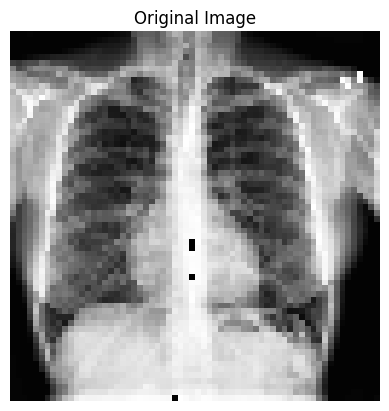

In [19]:
import matplotlib.pyplot as plt
plt.imshow(background[sample_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

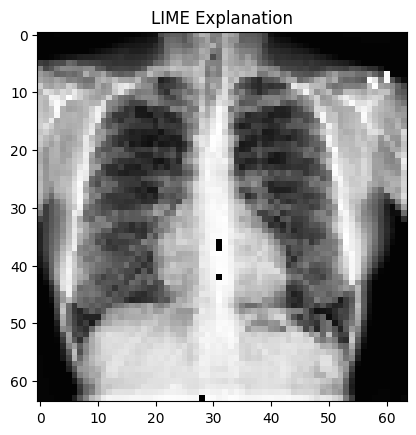

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.show()